In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds

In [ ]:
import pathlib

In [ ]:
data_dir = "/content/drive/MyDrive/project2/data_train_class"
data_dir = pathlib.Path(data_dir)

In [ ]:
image_count = len(list(data_dir.glob('*/*.png')))
print(image_count)

4277


In [ ]:
batch_size = 32
img_height = 224
img_width = 224

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=12,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4277 files belonging to 15 classes.
Using 3422 files for training.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=12,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4277 files belonging to 15 classes.
Using 855 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['bottle', 'cable', 'capsule', 'carpet', 'grid', 'hazelnut', 'leather', 'metal_nut', 'pill', 'screw', 'tile', 'toothbrush', 'transistor', 'wood', 'zipper']


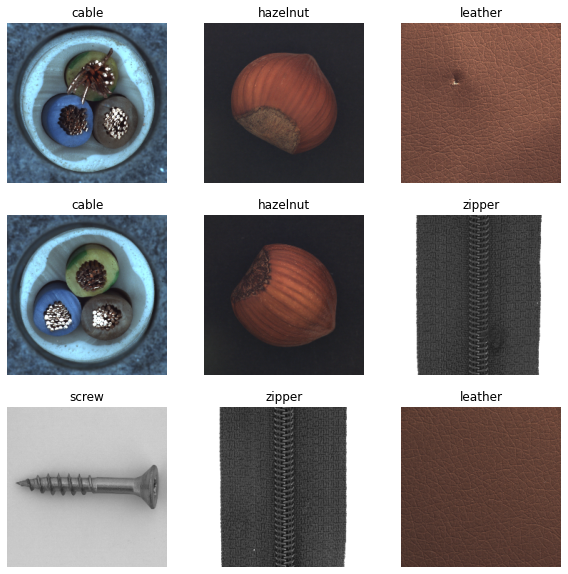

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, MaxPooling2D
from tensorflow.keras import datasets
# from tensorflow.keras.applications.resnet50 import preprocess_input
# from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import Input
from tensorflow.keras.layers import Dropout, BatchNormalization

base_model = tf.keras.applications.efficientnet.EfficientNetB7(include_top=False, pooling = 'avg' , input_shape = (224,224 ,3),
                                                               weights = 'imagenet')
base_model.trainable = False
# base_model = ResNet50(include_top=False, pooling = 'avg' , input_shape = (224,224 ,3), weights = 'imagenet')
# base_model.trainable = True
# input_y = tf.keras.utils.to_categorical(train_ds, 5)
# test_y = tf.keras.utils.to_categorical(val_ds, 5)

# 모델 layer 설계
inputs = tf.keras.Input(shape=(224,224,3))
# x = tf.keras.applications.efficientnet.preprocess_input(x)
x = base_model(inputs, training=False)
# x = Flatten()(x)
# x = tf.keras.layers.Dropout(0.2)(x)
outputs = Dense(15, activation = 'softmax')(x)
model_res = tf.keras.Model(inputs, outputs)

258088960/258076736 [==============================] - 2s 0us/step


In [ ]:
model_res.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb7 (Functional)  (None, 2560)             64097687  
                                                                 
 dense (Dense)               (None, 15)                38415     
                                                                 
Total params: 64,136,102
Trainable params: 38,415
Non-trainable params: 64,097,687
_________________________________________________________________


In [ ]:
model_res.compile(optimizer='adam',loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

history = model_res.fit(train_ds,validation_data=val_ds, epochs=10, callbacks=[early])

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


107/107 [==============================] - 558s 5s/step - loss: 0.2251 - accuracy: 0.9784 - val_loss: 0.0189 - val_accuracy: 0.9977
Epoch 2/10
107/107 [==============================] - 64s 569ms/step - loss: 0.0093 - accuracy: 1.0000 - val_loss: 0.0097 - val_accuracy: 1.0000
Epoch 3/10
107/107 [==============================] - 64s 565ms/step - loss: 0.0047 - accuracy: 1.0000 - val_loss: 0.0065 - val_accuracy: 1.0000
Epoch 4/10
107/107 [==============================] - 65s 573ms/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.0049 - val_accuracy: 1.0000
Epoch 5/10
107/107 [==============================] - 64s 572ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.0040 - val_accuracy: 1.0000
Epoch 6/10
107/107 [==============================] - 65s 575ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.0034 - val_accuracy: 1.0000
Epoch 7/10
107/107 [==============================] - 65s 578ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0029 - val_accuracy: 1.000

In [ ]:
img = tf.keras.preprocessing.image.load_img(
    '/content/drive/MyDrive/project2/open/test/20000.png', target_size=(224, 224)
)
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model_res.predict(img_array)

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(predictions[0])], 100 * np.max(predictions[0]))
)

This image most likely belongs to tile with a 59.90 percent confidence.


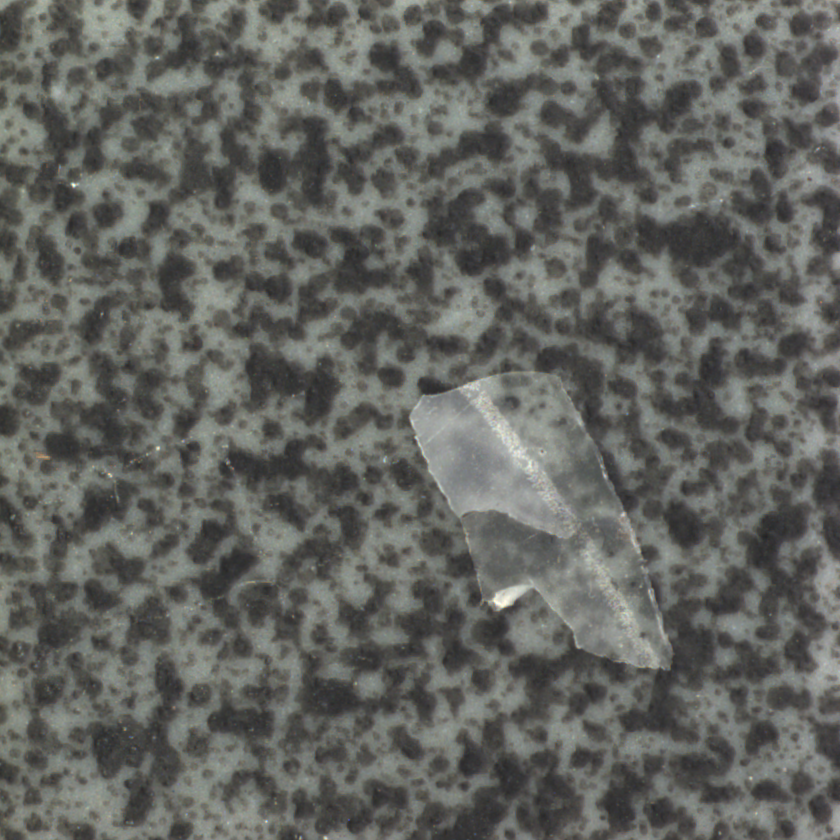

In [17]:
import cv2

image = cv2.imread("/content/drive/MyDrive/project2/open/test/20000.png", cv2.IMREAD_ANYCOLOR)
from google.colab.patches import cv2_imshow
cv2_imshow(image)